## 1.1 Intro to Keras

Keras is a deep learning API written in Python, running on top of the machine learning platforms [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org). It was developed with a focus on enabling fast experimentation.

If you're unfamiliar with TensorFlow, we have already seen a little bit of it in action when we messed around with the [TensorFlow Playground](https://playground.tensorflow.org). 
TensorFlow is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:
- Efficiently executing low-level tensor operations on CPU, GPU, or TPU.
- Computing the gradient of arbitrary differentiable expressions.
- Scaling computation to many devices (e.g. the Summit supercomputer at Oak Ridge National Lab, which spans 27,000 GPUs).
- Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.

Like many other useful tools, Keras comes pre-installed with Google Colab:

In [ ]:
import keras

The core data structures of Keras are `layers` and `models`. The simplest type of model is the `Sequential` model, a linear stack of layers. 



In [ ]:
from keras.models import Sequential

## 1.2 Generating a toy dataset

Before we can build a useful model, we need some data.

We'll be using [scikit-learn](https://scikit-learn.org) for this - because it provides an easy way to generate some sample data.

Let's generate 500 data points lying on one of two concentric circles. The data points on the inner circle will be of class 0 and data points on the outer circle will be of class 1. We'll also add a little bit of noise:



In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


It is custom to call the feature matrix `X` (or `X_train`, `X_test`) and the vector of target labels (classes) `y` (or `y_train`, `y_test`).
You can see from the above output that our feature matrix `X` has shape 500x2, meaning it has 500 data points with two features each.
The `y` vector simply stores the target label for each data point, so it should have shape 500x1.

We can visualize the data as follows:

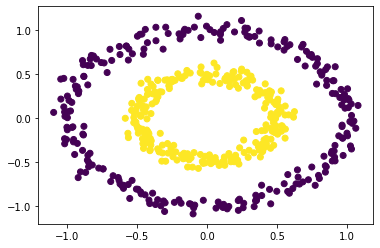

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

Now we're ready to build our first neural network.

We'll start with an empty `Sequential` model and then add two layers:
- The first layer has 4 neurons in it: both input features are connected to all neurons in the layer. This is known as an "all-to-all" or "dense" connection. Hence we use the `Dense` layer. We'll add a ReLU as activation function.
- The second layer has 2 neurons in it: all 4 neurons of the previous layer are connected to both neurons in this layer. This is again a `Dense` layer with a ReLU activation function:
- The output layer has a single neuron in it: its activation will determine the class we're predicting (activation < 0.5: class 0, activation >= 0.5, class 1)

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


To allocate the weights, each layer needs to know the number of its inputs. In a hidden layer, this is inferred automatically. However, the first layer can't automatically guess what input data you're going to present, so you need to tell it the right `input_shape`.

By default, each layer uses a bias vector (`use_bias=True`), whose values do not depend on the input features. This allows the layer to do calculate `y=ReLU(ax+b)` instead of just `y=ReLU(ax)`.



## 1.3 Differences to TensorFlow Playground

Guess what! This is (almost) the same as the default network you see when you first open [TensorFlow Playground](https://playground.tensorflow.org).
We're not sure what loss function they used, or whether they included a bias vector. But what are some other differences between ours and Playground?

Name at least two:

---

### As for the differences between these two models, first we can see that the ___activation function___ for TensorFlow playground is set as Tanh, while we defined activation functions for our dense layers as relu for the first two layers and sigmoid as the output layer.

### Second, we see that the ___learning rate___ is also different where keras uses 0.001 as learning rate but the the playground uses 0.03.

### Another difference could be the ___noise___ in our dataset, while the playground doesn't have any noise on the data by default.

---


## 1.4  Training the model

Now we are ready to train the model.

First we need to build it by translating the network specifications above into an executable network. This is done with `compile`. Here we have the option to specify which [loss function](https://keras.io/api/losses/) to use (e.g., mean squared error), which [solver](https://keras.io/api/optimizers/) to use (e.g., stochastic gradient descent, adam), which metrics to output (e.g., accuracy), etc.

Since this is a classification task, we want to use the cross-entropy loss.

What are some other loss functions that work for classification? Name at least two:


---

### As for the loss function for binary classification tasks, these are optimal: 
- Cross-Entropy
- Hinge Loss
- Squared Hinge Loss

### As for Multi-Class Classification Loss Functions, the following are optimal:
- Cross-Entropy Loss
- Sparse Multiclass Cross-Entropy Loss
- Kullback Leibler Divergence Loss

---


We'll also use stochastic gradient descent (SGD) with a 0.03 learning rate (just like Playground):


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.03), 
              metrics=['accuracy'])

Then we're ready to train the model for 150 epochs, using the same batch size as Playground.

But what does batch size 10 mean?

---

### In the field of machine learning, the phrase "batch size" refers to the number of training examples that are used during a single iteration of the process of learning. In other words, the batch size is a number of samples processed before the model is updated.

### The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

---


In [ ]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
50/50 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.5300
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6020
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6700
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6520
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7300
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7140
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7280
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7340
Epoch 9/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7240
Epoch 10/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.7040
Epoch 11/

## 1.5 Plotting the decision boundaries

Your network should achieve 100% accuracy after 150 epochs. We could look at some other metrics to convince ourselves that the network did a good job. Or we could visualize the decision boundaries, like TensorFlow Playground does.

There are probably some useful third-party libraries for this, but in principle, the idea is to feed all possible combinations of input features to the model and look at the predictions:

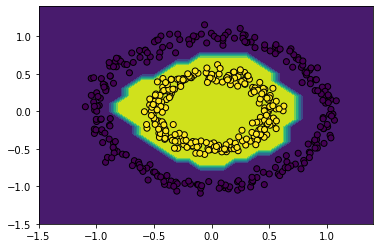

In [ ]:
# Create a mesh grid of (x1,x2) feature values:
import numpy as np
x1, x2 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                     np.arange(-1.5, 1.5, 0.1))

# Have the model predict the labels:
zz = model.predict(np.vstack((x1.ravel(), x2.ravel())).T)

# Convert from one-hot encoding back to [0, 1] labels:
zz = np.int32(zz[:, 0] >= 0.5).reshape(x1.shape)

# Plot it:
plt.contourf(x1, x2, zz)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

You should see that all yellow data points lie in the yellow region, and all blue data points lie in the blue region. This confirms that the network correctly classified all data points!

Now let's look at a more complicated example.

<hr>

# 2. MNIST

In this section we want to build a CNN for handwritten digit classification using the MNIST dataset.

## 2.1 Loading the dataset 

The first step is to load the dataset. Fortunately, it comes bundled with Keras:

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let's plot a couple of example stimuli:

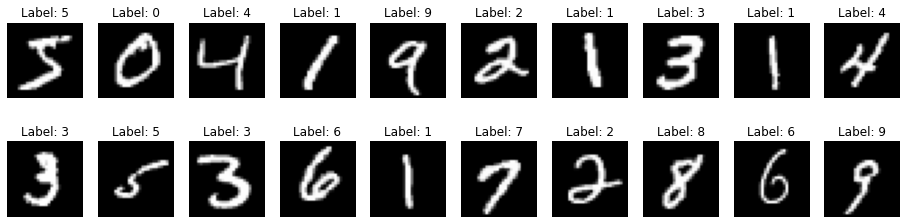

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(16, 4))
for i, ax in enumerate(axes.ravel()):
	ax.imshow(np.squeeze(X_train[i]), cmap='gray')
	ax.axis('off')
	ax.set_title(f"Label: {y_train[i]}")

The dataset has already been split into training and test data. How many training and test samples does it have? How big is each image?

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

---

### We have 60,000 images for training and 10,000 for testing. Image sizes for both of them are 28 * 28 pixels

---


For each of these training samples, we also have a class label indicating which digit this image is shown (0-9).

To make this dataset work with Keras, we need to make sure input image size is 28x28x1, not 28x28. We'll also scale the images to the [0,1] range:

In [ ]:
# Scale to [0,1]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1):
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Finally, we need to transform the labels, from an integer 0-9 to a vector of zeros and ones. This is called a one-hot encoding.

The reason is that our network will have 10 output neurons. If the first neuron is active, it means we are predicting the first class (digit 0). If the last neuron is active, we predict digit 9. etc.

For this to work, we need a vector where all entries are zero except for the one that corresponds to the class we want to predict.
For example, predicting digit 0 would be represented as follows:

    [1 0 0 0 0 0 0 0 0]

The digit 1 would be represented as follows:

    [0 1 0 0 0 0 0 0 0]

In other words, with this one-hot encoding we are telling the network that all neurons in the output layer should be silent - except the first one if we want to predict digit 0, or the second one if we want to predict digit 1, etc.

We can do this easily with the `to_categorical` utility function:

In [ ]:
# For future reference:
num_classes = len(np.unique(y_train))
img_shape = X_train.shape[1:]

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 2.2 Building the model

Now on to the network architecture. We will start simple.

Let's build a network with a single convolutional layer. We will learn 32 different filters. Kernel size should be 3x3, and we want to feed the output of the convolution through a ReLU:

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), input_shape=img_shape, activation="relu")
])

So far so good. But this is not suitable as output layer of our network. Remember, we should have 10 neurons in the output layer, one for each class.

So we need to flatten the output of the convolutional layer, and then densely connect to 10 neurons:

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_8 (Dense)             (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


The `summary` command tells us that even with this single convolutional layer (and a dense layer), we have 216,760 trainable parameters.

In which layer are most of these trainable parameters located, and why?

---

### Most of these trainable parameters are located in the dense layer. As we can see, after the convolutional layer, we flatten the data and that makes kernel from 2D to 1D which inforces us to use more neurons for next layer and that increases the number of parameters as a result of that. 

### Another point here is that the image size was 28 * 28, and the kernel reduces the size because of loosing edges and that makes the data 26 * 26 in conv layer.

---


## 2.3 Training the model

OK let's train the model and see how good it is (spoiler alert: it's not bad at all).

We'll use stochastic gradient descent with batch size 128. We'll train for 10 epochs and then calculate accuracy. Each epoch should only take maybe 20s, so you should be done in 2-3 minutes.


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 21s 44ms/step - loss: 0.6965 - accuracy: 0.8313
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.3518 - accuracy: 0.8998
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.3236 - accuracy: 0.9082
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.3083 - accuracy: 0.9125
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2989 - accuracy: 0.9155
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2926 - accuracy: 0.9167
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2879 - accuracy: 0.9191
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2835 - accuracy: 0.9197
Epoch 9/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2795 - accuracy: 0.9208
Epoch 10/10
469/469 [==============================] - 20s 42ms/step - loss: 0.276

## 2.4 Evaluating the model

Now we can use `model.evaluate` to calculate the loss on the whole training set as well as the whole test set:

In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", loss)
print("Train accuracy:", acc)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)

Train loss: 0.265659898519516
Train accuracy: 0.9250500202178955
Test loss: 0.261096715927124
Test accuracy: 0.9259999990463257


Would you expect the training or the test accuracy to be better? Why?

---

### Generally speaking, the model should perform better on detecting training set compared to test set images. The reason for that is because the model has been trained on the trainset and it has already been introduced to all of the features of the trainset (the model has seen the exact thing before). However, the testing data may introduce new patterns and seem new to the model that it could perform slightly worse.

### In here though, we can see that the model performs arround 1% better on test set, and that does not suppose to happen! Ways in which this behavior might happen are:
- Most likely we provided a different (and more agreeable) dataset for test, and the issue is rooted in incoherent train/test data split.
- A disproportionately high level of regularization was used.

---


## 2.5 Improving the model

A network with 1 convolutional layer is not exactly deep. So let's add more layers!

One thing that the visual cortex does is extracting features at different scales. This is also an important trick in object detection, recognition, and segmentation.

We can do this by subsampling the image with a `MaxPoolingLayer2D`, and then adding another convolutional layer that will learn convolutional features on this smaller image.

So let's rebuild the network with an additional max pooling layer (pool size 2x2) and an additional convolutional layer (same as above, except now we want 64 output channels):


In [ ]:
def make_better_model():
  model = Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape= img_shape, activation="relu"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), input_shape= img_shape, activation="relu"))
  model.add(layers.Flatten())
  model.add(Dense(10, activation='softmax'))
	# Let's compile the model as well
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

better_model = make_better_model()
better_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                77450     
                                                                 
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
__________________________________________________

How many parameters does the network have now? Why did it change?

---

### The model parameters now has been reduced to 96,266, and the reason for that is because in this model, we are using max_pooling 2d layer. Max pooling 2D causes reduction in the output size of layer by a half amount (as we can see, from 26*26 to 13*13). The output of this layer is then being fed to the next conv layer, and just like before, the kernel cuts the edges of the input and reduces 13*13 to 11*11. We can see that since we have a smaller convolutional layer, the flatten produces smalleroutput shate, which also contributes to reduction in the Total number of parameters in the model.

### In short, a pooling layer's main goal is to "accumulate" characteristics from maps created by applying a filter to a picture. Its formal purpose is to gradually shrink the spatial dimension of the representation in order to minimize the number of parameters and computations in the network.

---


Based on the change in number of parameters, would you expect the new model to perform better or worse than the above?

---

### Although the number of parameters has been reduced, I still expect the model to perform better. This basically rooted in the fact that we have added an additional convolutional layer that will contribute in better detection of patterns in hand-written numbers. Also, Max pooling is done to help prevent over-fitting in part by giving a simplified version of the representation. It also lowers the cost of computing by cutting down on the number of parameters that need to be learned, and it makes the internal representation less sensitive to translation.

---


Let's find out! Retrain the model for 10 epochs (each epoch should take roughly 40 seconds):

In [ ]:
# The model has already been compiled
better_model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 52s 111ms/step - loss: 0.3542 - accuracy: 0.8996
Epoch 2/10
469/469 [==============================] - 52s 110ms/step - loss: 0.1112 - accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0689 - accuracy: 0.9788
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0582 - accuracy: 0.9821
Epoch 6/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 7/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0458 - accuracy: 0.9859
Epoch 8/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 9/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0377 - accuracy: 0.9882
Epoch 10/10
469/469 [==============================] - 51s 108ms/step - l

In [ ]:
loss, acc = better_model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", loss)
print("Train accuracy:", acc)

loss, acc = better_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)

Train loss: 0.026578446850180626
Train accuracy: 0.9922999739646912
Test loss: 0.04152803495526314
Test accuracy: 0.9871000051498413


How did the network's performance change? Would you expect the network's accuracy to keep improving if we added more layers?

---

### The models performs 7% better on the train set and 6% better on the test set. The new model also reduced loss values for both training and testing sets dramatically. 

### Adding too many hidden layers can ___overfit our model___ to perform great on train set but poorly on test set (simply memorizing train set). It is more usual to have an overfit model by adding too many layers than it is to have an underfit model since it is so easy to correct an underfit model. There are two different approaches one may use when dealing with an overfit model:
* Reduce overfitting by training the network on more examples
* Reduce overfitting by changing the complexity of the network (Which we can use here to avoid too complex Deep Neural Net)

### Another point here is that the depth of a model is determined by the number of layers that it contains. Increasing the model's depth results in an increase in its capacity. When it comes to computational efficiency, training deep models, such as those with a large number of hidden layers, can be superior to training a single-layer network with a very large number of nodes. In the past, training neural network models with more than a few layers has been difficult owing to issues such as vanishing gradients. This is because of the complexity of the problem. More recently, innovative methodologies have made it possible to train deep network models. This has made it possible to construct models of amazing depth that are able to achieve excellent performance on difficult tasks in a broad variety of domains.



---


FYI, this is an ok result but it won't win you any awards - the state-of-the-art is at something like 99.99% accuracy.